# Hotel Booking Demand 

Bookings cancellations have significant impact on demand-management decisions in the hospitality 
industry. As a result hotels implanted firm policies that aim at reducing the effects cancellation 
such overbooking, non-refundable reservations. However, these policies can make customers 
select other alternative with more flexible options thus having significant negative impact on the 
hotel revenue and social reputation.Therefore, accurate forecasting of booking cancellation
model is a major key for successful hotel revenue management

In this project we will be working with a dataset that contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

note: all hotels were located in Portugal.

This data set contains the following features:
* 'ADR': Average Daily Rate (Price).
* 'Agent': ID of the travel agency that made the booking.
* 'ArrivalDateDayOfMonth': Day of the month of the arrival date.
* 'ArrivalDateMonth': Month of arrival date with 12 categories: “January” to “December”.
* 'ArrivalDateWeekNumber': Week number of the arrival date.
* 'ArrivalDateYear': Year of arrival date.
* 'AssignedRoomType': type of room assigned to the booking.
* 'Babies': Number of babies.
* 'BookingChanges': Number of changes made to the booking from the moment the booking was made until the moment of  check-in or cancellation.
* 'Children': Number of children.
* 'Company': ID of the company/entity that made the booking.
* 'Country': Country of origin.
* 'CustomerType': Type of customer.
* 'DaysInWaitingList': Number of days the booking was in the waiting list before it was confirmed to the customer.
* 'DepositType':Indication on if the customer made a deposit to guarantee the booking.
* 'DistributionChannel': Booking distribution channel.
* 'IsCanceled': indicating if the booking was canceled or not.
* 'IsRepeatedGuest'indicating if the booking name was from a repeated guest or not.
* 'LeadTime': Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
* 'MarketSegment': Market segment designation.
* 'Meal': Type of meal booked.
* 'PreviousBookingsNotCanceled': Number of previous bookings not cancelled by the customer prior to the current booking.
* 'RequiredCardParkingSpaces': Number of car parking spaces required by the customer.
* 'ReservationStatus': Reservation last status.
* 'ReservationStatusDate': Date Date at which the last status was set.
* 'ReservedRoomType': Code of room type reserved.
* 'StaysInWeekendNights': Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* 'StaysInWeekNights': Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* 'TotalOfSpecialRequests': Number of special requests made by the customer.

## Set up notebook and load data set

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
print(df.shape)

(119390, 32)


we have 119k samples and 32 features

## Data Exploration and Cleaning

**Check the head of ad_data**

In [4]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

Checking Null Values in the columns 

In [5]:
df.isnull().sum() * 100 / len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

We notice that company has more than 94% of its contants is empty, so I decided to drop it.
Moreover it represent the ID of the company/entity that made the booking or responsible for paying thebooking. ID is presented instead of designation for anonymity reason
Essentially this columns provide no information

Other columns that provided no uselfull information includes:
* Country:
Because the only way to confirm the country is when the guests presented to confirm the booking, for the cancelled booking there is no way to check if it is true or not. Most of the cancelled booking were automatically assigned by defult to country of the hotel (Portugal) which creates a bias.
* Agent: 
Because there is no reference for the Agent ID due to anonymity reasons, therefore there is no useful information that can be added to the model by only having the ID of the agency.
* The Reservation Status and reservation Status Date:
Because the prediction model can learn implicitly from them whether the booking will be confirmed or cancelled.
* Arrival Date Year:
the dataset has been collected over only two years, then our model can’t capture any 
repetitive information in the years level for example if we have a dataset collected over 20 years 
then the model will predict any event that usually happens every three or four years like the 
elections, and the model can learn from that if the hotel booking demand in that date will be high 
or low.

So, We only left with children to fill in the missing values with the median  

In [8]:
df_droped_features= df.drop(['reservation_status','agent','country','company','arrival_date_year','reservation_status_date'],axis=1)

In [9]:
df_droped_features.describe()

is_canceled      lead_time  arrival_date_week_number  \
count  119390.000000  119390.000000             119390.000000   
mean        0.370416     104.011416                 27.165173   
std         0.482918     106.863097                 13.605138   
min         0.000000       0.000000                  1.000000   
25%         0.000000      18.000000                 16.000000   
50%         0.000000      69.000000                 28.000000   
75%         1.000000     160.000000                 38.000000   
max         1.000000     737.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
std                1.908286       0.579261       0.398561       0.097436   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
std             0.175767                0.844336   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                   119390.000000    119390.000000         119390.000000   
mean                         0.137097         0.221124              2.321149   
std                          1.497437         0.652306             17.594721   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        21.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.575000                     0.000000                   0.000000  
75%       126.000000                     0.000000                   1.000000  
max      5400.000000                     8.000000                   5.000000

the median for children is 0, lets fill the null values

In [12]:
df_droped_features.fillna(df_droped_features.children.median(), inplace=True)
df_droped_features = df_droped_features[df_droped_features.adr != 5400]

Checking one last time for null values:

In [13]:
df_droped_features.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

## Feature Engineering 

### Impleminting ADRThirdQuartileDeviation 

The expensive room price compared to similar rooms and same period of time usually has more probability to be cancelled, for this reason I engineered a new feature that captured this relation and I called it (ADRThirdQuartileDeviation) which represents the ratio of the price of each booking ADR by the third quartile value of the price of all bookings with similar room type 
and same period of arrival time and same room type. 

In [14]:
df_droped_features["ADRThirdQuartileDeviation"]=df_droped_features.groupby(["arrival_date_week_number","reserved_room_type"])['adr'].transform(lambda x: x / x.quantile(.75))

## Exploratory Data Analysis

Let's use seaborn to explore the data!

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

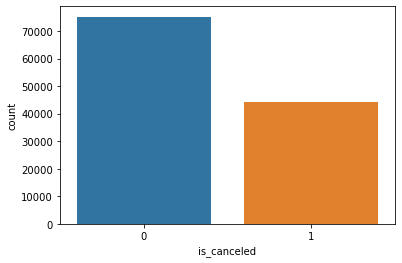

In [15]:
sns.countplot(x='is_canceled',data=df_droped_features)

Data is imbalanced

Check if there is a correlation between adr (price) and total_special_requests 

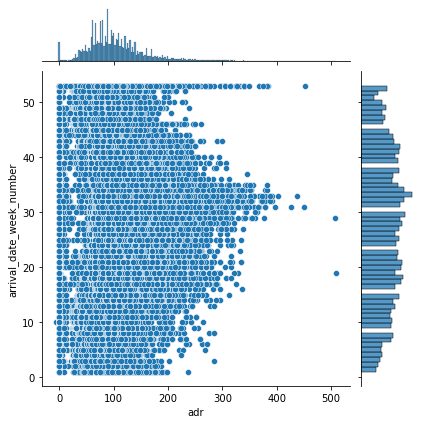

In [16]:
sns.jointplot(x='adr',y='arrival_date_week_number',data=df_droped_features)

Check if there is a correlation between arrival_date_week_number and lead_time 

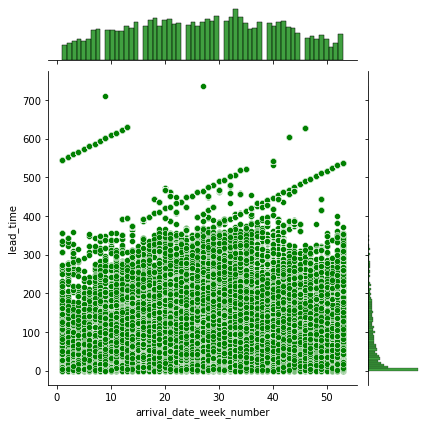

In [17]:
sns.jointplot(x='arrival_date_week_number',y='lead_time',data=df_droped_features,color='green')

Text(0.5, 1.0, 'df_droped_features.corr()')

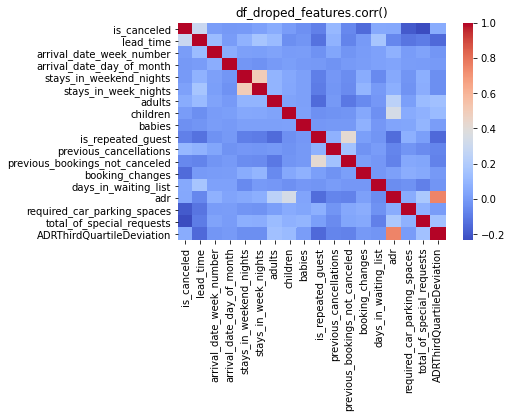

In [18]:
sns.heatmap(df_droped_features.corr(),cmap='coolwarm')
plt.title('df_droped_features.corr()')

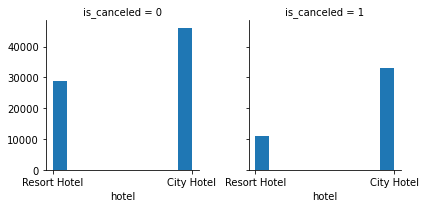

In [19]:
g = sns.FacetGrid(data=df_droped_features,col='is_canceled')
g.map(plt.hist,'hotel')

 #### pairplot 

In [20]:
#sns.pairplot(df_droped_features,hue='is_canceled',palette='bwr', kind='kde')

### Implementing Encoding for categorical features

In [21]:
df_droped_features1=pd.get_dummies(df_droped_features, drop_first=True)

In [22]:
df_droped_features1.shape

(119389, 70)

Droping NAN values

In [23]:
df_droped_features1 = df_droped_features1.dropna()

In [24]:
df_droped_features1.shape

(119377, 70)

###  Splitting the data into a training, validation and test sets

In [25]:
x=df_droped_features1.drop("is_canceled",axis=1)
y=df_droped_features1["is_canceled"]

In [26]:
#split 70/15/15
from sklearn.model_selection import train_test_split
trainx, tvx, trainy, tvy = train_test_split(x, y, test_size=0.30, random_state=777) #70% Training 
testx, valx, testy, valy = train_test_split(tvx, tvy, test_size=0.50, random_state=777) #15% Test, 15% Validation

##  Models:

### 1-Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
# training and hyper-parameter tuning
# Gini criterion
tree=DecisionTreeClassifier(criterion='gini',random_state=777)
tree.fit(trainx,trainy)
print(tree.score(valx,valy))

0.8234768526274642


In [28]:
# entropy criterion
tree=DecisionTreeClassifier(criterion='entropy',random_state=777)
tree.fit(trainx,trainy)
tree.score(valx,valy)
print(tree.score(valx,valy))

0.8204054280448987


gini performed better than entropy

In [29]:
#Selecting the Best depth of the tree 
for K in range(15,25):

    tree=DecisionTreeClassifier(criterion='gini',max_depth=K,random_state=777)
    tree.fit(trainx,trainy)
    print(K,tree.score(valx,valy))

15 0.8309041157089406
16 0.8307924275423019
17 0.8310158038755794
18 0.8311274920422181
19 0.8295638577092757
20 0.8308482716256212
21 0.8292287932093595
22 0.8264924331267103
23 0.8274417825431396
24 0.8263249008767521


In [30]:
#Selecting the minimum number of samples required to split an internal node
for K in range(2,20,2):

    tree=DecisionTreeClassifier(criterion='gini',max_depth=17, min_samples_split=K,random_state=777)
    tree.fit(trainx,trainy)
    print(K,tree.score(valx,valy))

2 0.8310158038755794
4 0.8309041157089406
6 0.8305690512090244
8 0.8309041157089406
10 0.8312950242921763
12 0.8299547662925113
14 0.829452169542637
16 0.8287261964594851
18 0.8291171050427207


From the Above experiments best hyperparmaters are (criterion='gini',max_depth=17, min_samples_split=16,,random_state=777)

In [31]:
#Accuracy & classification Report for best Validation 
tree=DecisionTreeClassifier(criterion='entropy',max_depth=17, min_samples_split=16,random_state=777)
tree.fit(trainx,trainy)
y_predect = tree.predict(valx)
print(classification_report(valy,y_predect))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11202
           1       0.82      0.68      0.74      6705

    accuracy                           0.82     17907
   macro avg       0.82      0.79      0.80     17907
weighted avg       0.82      0.82      0.82     17907



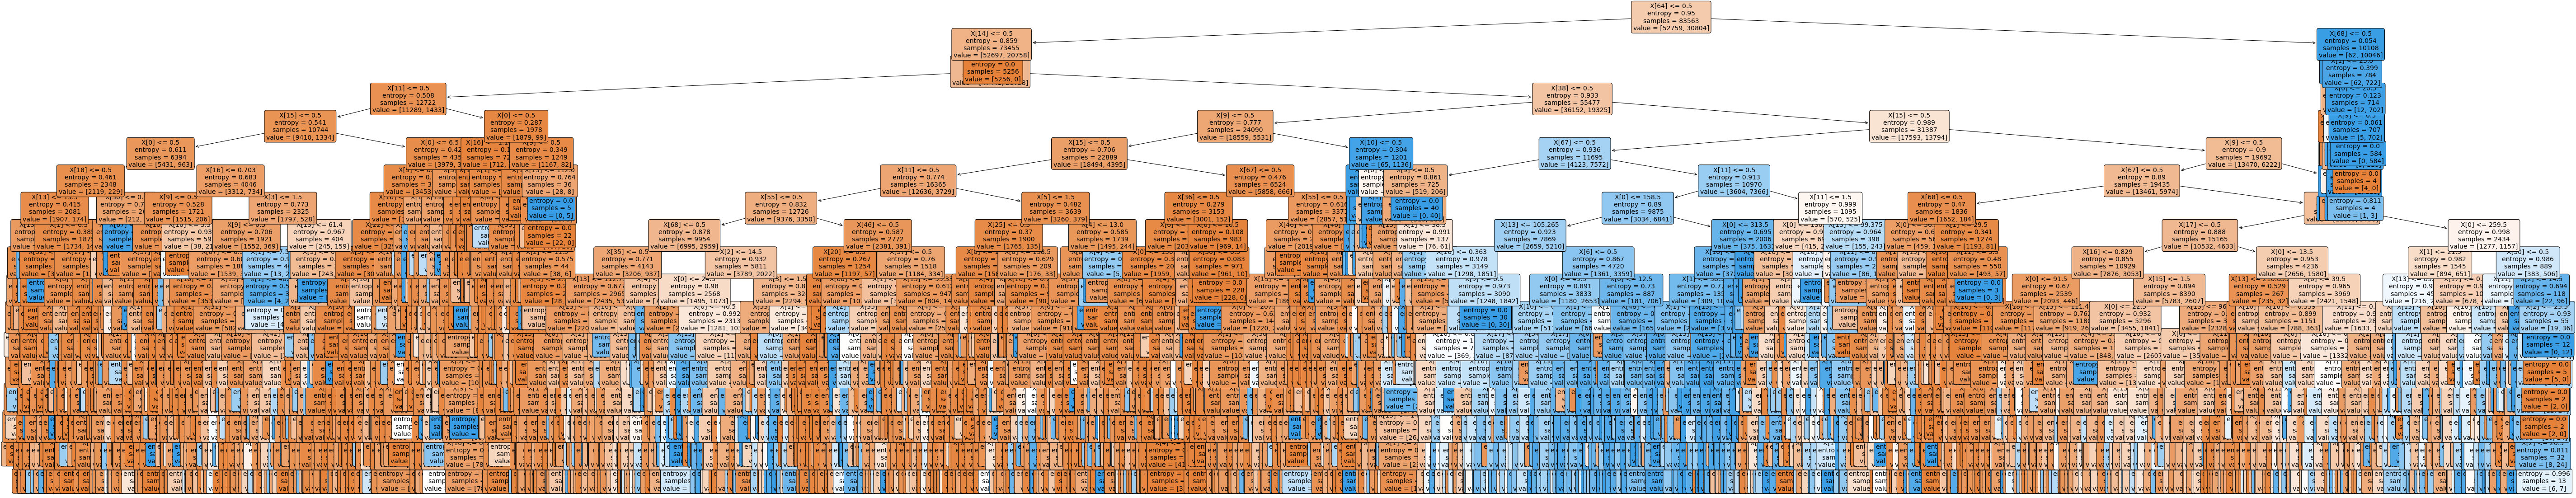

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100,20))
a = plot_tree(tree,  
              filled=True, 
              rounded=True, 
              fontsize=14)

## Preprocessing data for Logistic Regression 

### Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
trainx_scaled = scaler.fit_transform(trainx) #scaling 

### 2-Logistic Regression

In [35]:
#Selecting the Best value of the C 

from sklearn.linear_model import LogisticRegression
for i in np.arange(0.001, 2.5, 0.5):

    logistic = LogisticRegression(penalty='l2',max_iter=6500,C=i)
    logistic.fit(trainx_scaled,trainy)
    print(i,logistic.score(valx,valy))

0.001 0.3806332719048417
0.501 0.5326967107834925
1.001 0.5521304517786341
1.501 0.5580499246104875
2.001 0.5670408220249065


From the Above experiments best value for C is 1.5

In [36]:
logistic = LogisticRegression(penalty='l2',max_iter=6500,C=1.5)
logistic.fit(trainx,trainy)
y_predect = logistic.predict(valx)
print(classification_report(valy,y_predect))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11202
           1       0.84      0.61      0.71      6705

    accuracy                           0.81     17907
   macro avg       0.82      0.77      0.78     17907
weighted avg       0.82      0.81      0.80     17907



Logistic Regression perofrmed poorly in the training

### 3-Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
# training and hyper-parameter tuning
for K in range(96,106,1):
    forest=RandomForestClassifier(n_estimators=K,random_state=777)
    forest.fit(trainx,trainy)
    print(K,forest.score(valx,valy))

96 0.8670910816998939
97 0.8674819902831296
98 0.8671469257832133
99 0.8679287429496845
100 0.8670352376165745
101 0.8673144580331714
102 0.8672027698665327
103 0.8673703021164908
104 0.8669793935332551
105 0.8672027698665327


From the Above experiments best value for n_estimators is 101

In [38]:
#Accuracy & classification Report for best Validation 
forest=RandomForestClassifier(n_estimators=101,random_state=777)
forest.fit(trainx,trainy)
y_predect = forest.predict(valx)
print(classification_report(valy,y_predect))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11202
           1       0.87      0.76      0.81      6705

    accuracy                           0.87     17907
   macro avg       0.87      0.85      0.85     17907
weighted avg       0.87      0.87      0.87     17907



### Choosed Random Forest as the final model

Test Report for Random forest model

In [39]:
#test Report for Random_forest
testx_scaled = scaler.transform(testx) #scaling 
print('Classification report for Test set')
y_predect = forest.predict(testx_scaled)
print(classification_report(testy,y_predect))

Classification report for Test set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11205
           1       0.87      0.76      0.81      6702

    accuracy                           0.87     17907
   macro avg       0.87      0.84      0.85     17907
weighted avg       0.87      0.87      0.86     17907



### Feature importance for Random Forest

In [40]:
import matplotlib.pyplot as pyplot
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13780
Feature: 1, Score: 0.05108
Feature: 2, Score: 0.06238
Feature: 3, Score: 0.02674
Feature: 4, Score: 0.04237
Feature: 5, Score: 0.01425
Feature: 6, Score: 0.00624
Feature: 7, Score: 0.00099
Feature: 8, Score: 0.00198
Feature: 9, Score: 0.04279
Feature: 10, Score: 0.00438
Feature: 11, Score: 0.02212
Feature: 12, Score: 0.00366
Feature: 13, Score: 0.07903
Feature: 14, Score: 0.02161
Feature: 15, Score: 0.06504
Feature: 16, Score: 0.08230
Feature: 17, Score: 0.01056
Feature: 18, Score: 0.00522
Feature: 19, Score: 0.00284
Feature: 20, Score: 0.00342
Feature: 21, Score: 0.00242
Feature: 22, Score: 0.00543
Feature: 23, Score: 0.00493
Feature: 24, Score: 0.00398
Feature: 25, Score: 0.00511
Feature: 26, Score: 0.00312
Feature: 27, Score: 0.00418
Feature: 28, Score: 0.00422
Feature: 29, Score: 0.00125
Feature: 30, Score: 0.00697
Feature: 31, Score: 0.00551
Feature: 32, Score: 0.00109
Feature: 33, Score: 0.00030
Feature: 34, Score: 0.00229
Feature: 35, Score: 0.00631
Fe

<AxesSubplot:>

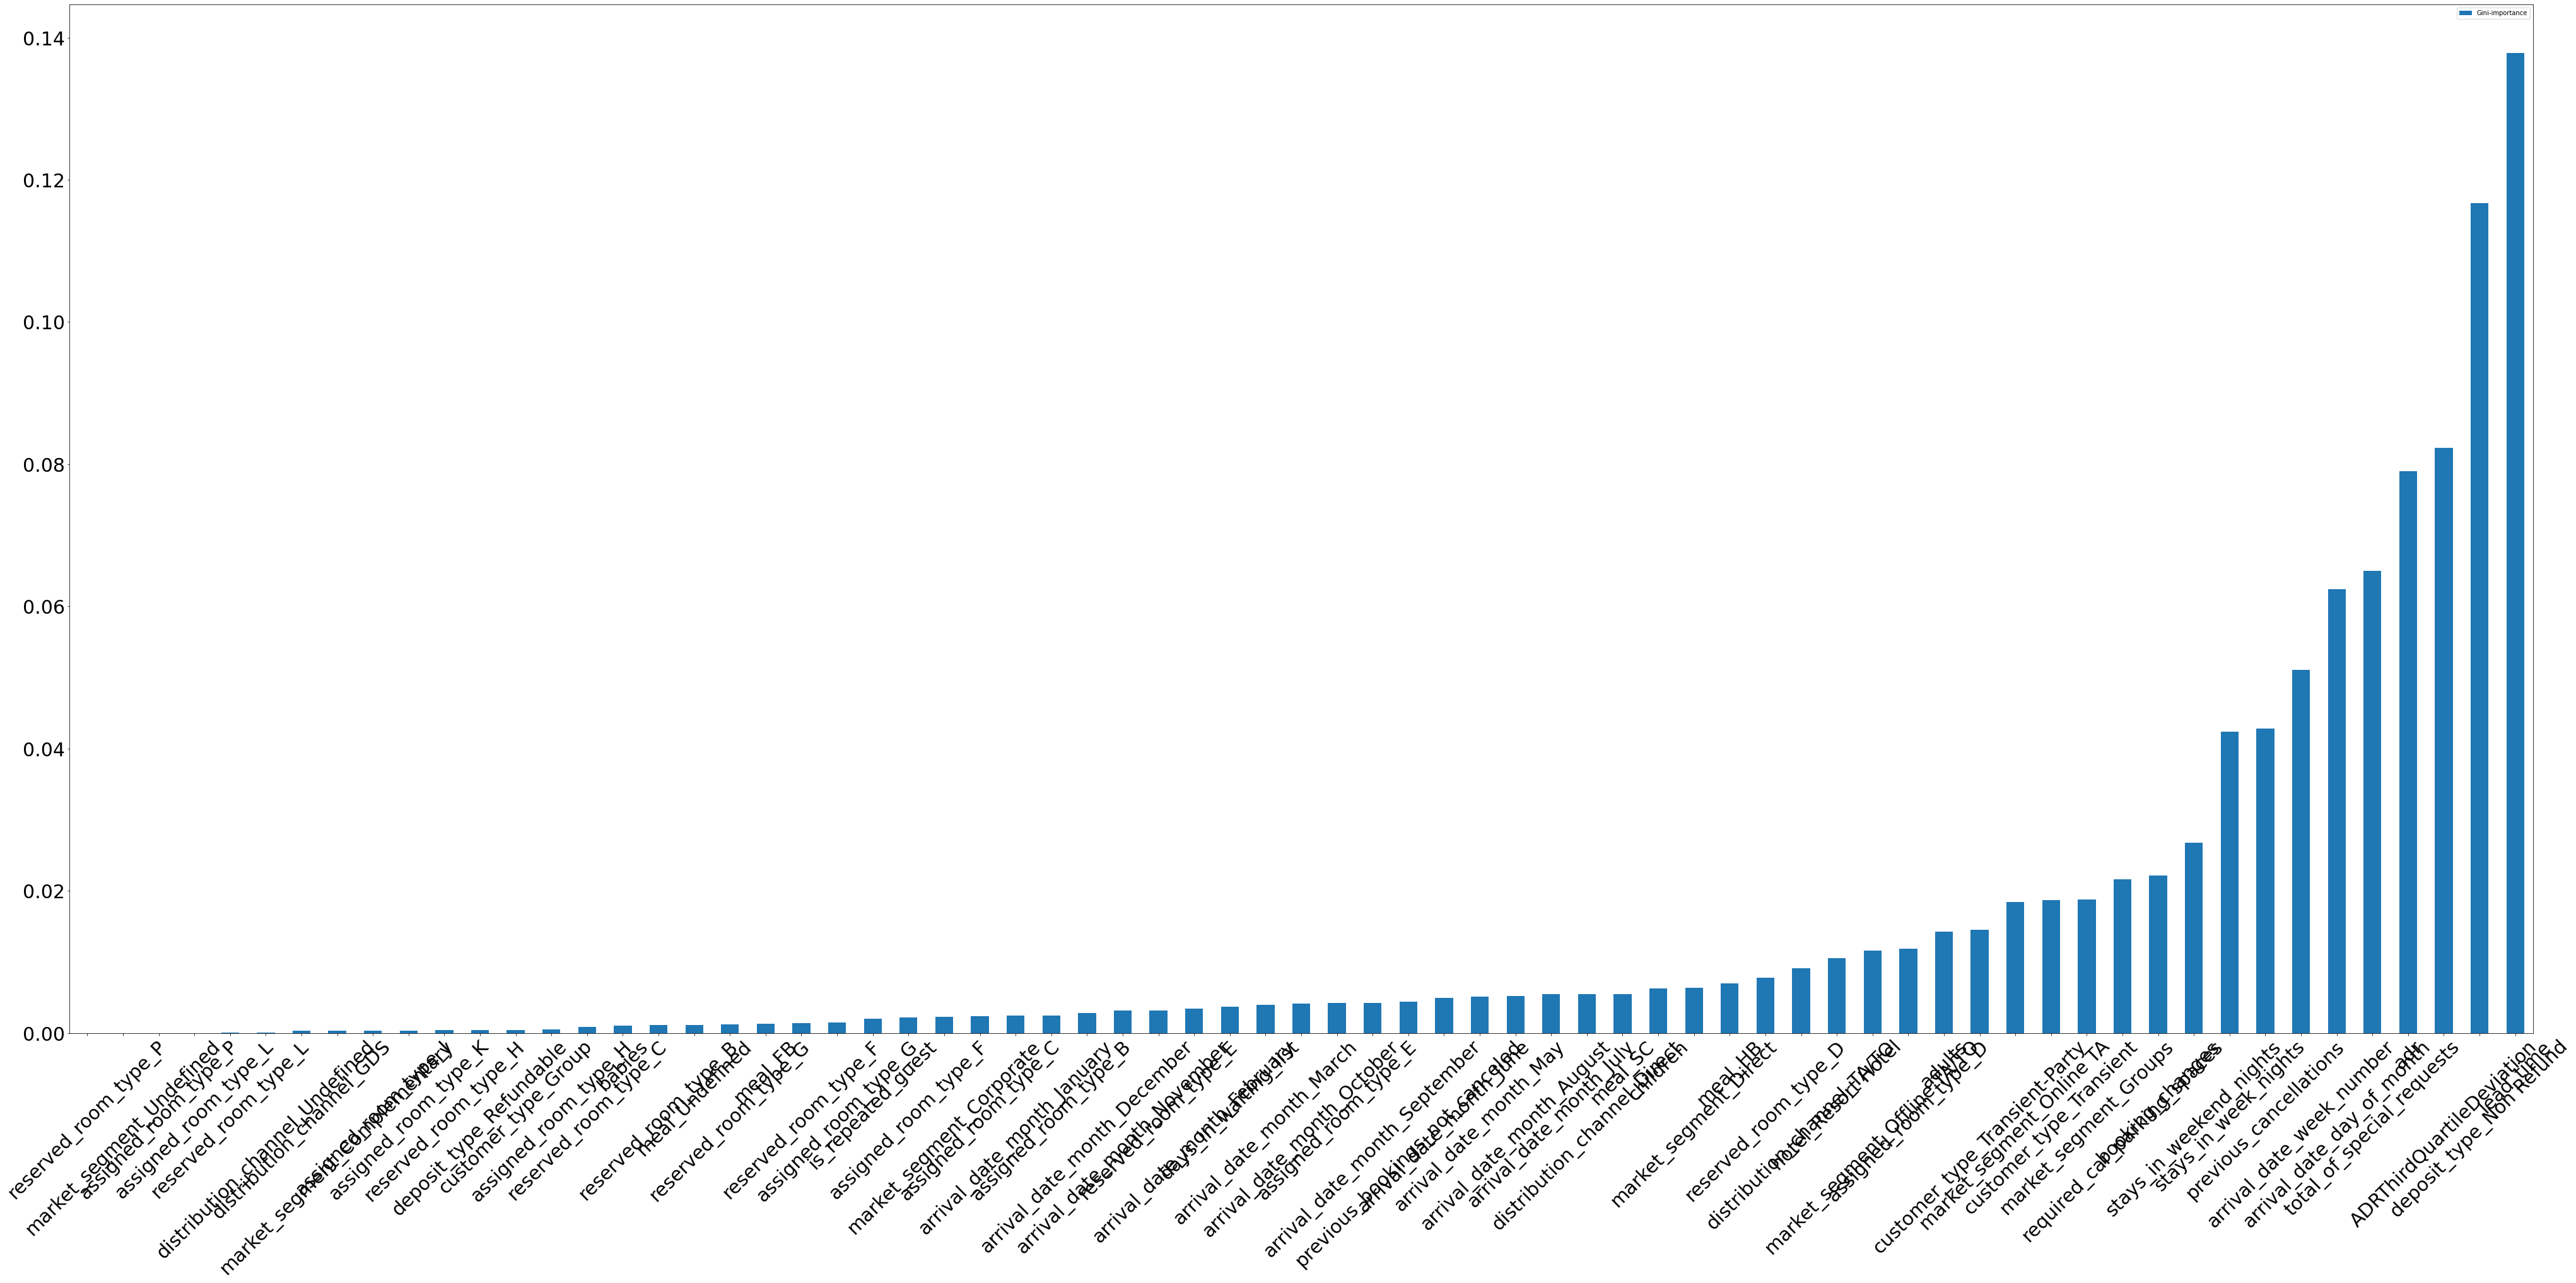

In [41]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(70,30),fontsize=30)